# Analyze predicted escape from the 3K antibodies

## Import `Python` modules

In [1]:
import os
import glob
from collections import defaultdict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read in data that predicts how much each virus has escaped each antibody

Read in data

In [2]:
f = '/fh/fast/matsen_e/shared/dmsa-pred/ncov-dmsa/results/cao_predictions/imprinted_2022_abs/all_predictions.csv'
escape_df = pd.read_csv(f)
escape_df.rename(columns={'group':'ab_group'}, inplace=True)
escape_df['escape_score'].clip(upper=1.0, inplace=True)
escape_df.head()

strain aa_substitutions  escape_score   antibody ab_group        date  \
0  ON641975.1              NaN      0.000000  BD55-6049       E3  2022-01-08   
1  ON641975.1      G446S N501Y      0.020197   BD56-965        B  2022-01-08   
2  ON641975.1              NaN      0.000000    XGv-318       F1  2022-01-08   
3  ON641975.1              NaN      0.000000  BD55-5687       E3  2022-01-08   
4  ON641975.1            E484A      0.005702    XGv-214     E2.1  2022-01-08   

  Nextstrain_clade      time  
0                ?  2.038356  
1                ?  2.038356  
2                ?  2.038356  
3                ?  2.038356  
4                ?  2.038356

In [3]:
new DATAFRAME jsut changed up a little 

SyntaxError: invalid syntax (3134218833.py, line 1)

In [3]:
import pandas as pd


df = pd.read_csv(f)
# calculate mean escape_score for each antibody for each date
df_mean_scores = df.groupby(['antibody', 'date', 'group']).mean().reset_index()

print(df_mean_scores)

        antibody        date group  escape_score      time
0           1-57  2019-12-26    D1        0.0000  0.000000
1           1-57  2020-01-01    D1        0.0000  0.016438
2           1-57  2020-01-12    D1        0.0000  0.046575
3           1-57  2020-01-13    D1        0.0000  0.049315
4           1-57  2020-01-20    D1        0.0000  0.068493
...          ...         ...   ...           ...       ...
1961263  XGv-422  2023-04-06    E3        0.0493  3.279452
1961264  XGv-422  2023-04-08    E3        0.0493  3.284932
1961265  XGv-422  2023-04-10    E3        0.0493  3.290411
1961266  XGv-422  2023-04-11    E3        0.0493  3.293151
1961267  XGv-422  2023-04-14    E3        0.0493  3.301370

[1961268 rows x 5 columns]


/tmp/ipykernel_25732/2332910990.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_scores = df.groupby(['antibody', 'date', 'group']).mean().reset_index()


In [ ]:
NEWEST WITH NO K MEANS CLUSTERING, JUST ONE GRAPH WITH EVERYTHING

new k means 

In [ ]:
escape_df['time'] > 2.5

First, we're interested in quantifying escape of viruses from antibodies in the last 6 months of the pandemic. To do this, we'll first get data for viruses from the past 6 months.

In [4]:
# Get data for all viruses after timepoint 2.5
recent_data = escape_df[escape_df['time'] > 2.5].copy()
recent_data.head()

strain aa_substitutions  escape_score   antibody  \
11112  Japan/SZ-NIG-Y223306/2023              NaN      0.000000  BD55-6049   
11113  Japan/SZ-NIG-Y223306/2023      F486V N501Y      1.000000   BD56-965   
11114  Japan/SZ-NIG-Y223306/2023              NaN      0.000000    XGv-318   
11115  Japan/SZ-NIG-Y223306/2023              NaN      0.000000  BD55-5687   
11116  Japan/SZ-NIG-Y223306/2023      L452R E484A      0.025182    XGv-214   

      ab_group        date Nextstrain_clade      time  
11112       E3  2023-02-07    22B (Omicron)  3.120548  
11113        B  2023-02-07    22B (Omicron)  3.120548  
11114       F1  2023-02-07    22B (Omicron)  3.120548  
11115       E3  2023-02-07    22B (Omicron)  3.120548  
11116     E2.1  2023-02-07    22B (Omicron)  3.120548

Next, we will group the data by the antibody group. For each group, we will compute the average escape of all viruses from antibodies in that group.

In [5]:
avg_escape_data = recent_data.groupby('ab_group')['escape_score'].mean(numeric_only=True)
avg_escape_data

ab_group
A       0.641310
B       0.830739
C       0.857928
D1      0.706632
D2      0.550412
E1      0.716593
E2.1    0.442404
E2.2    0.200150
E3      0.071638
F1      0.078246
F2      0.440698
F3      0.648195
Name: escape_score, dtype: float64

**Observations**
* Many of the antibody groups have high average escape scores, some have mediocre escape scores
* What could explain this pattern? One idea is that the epitopes with low escape scores are non-neutralizing.

Next, we'll plot the above results as a histogram

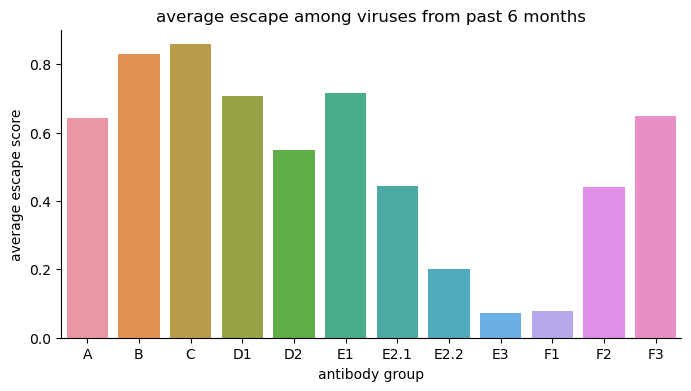

In [6]:
avg_escape_data = recent_data.groupby('ab_group').mean(numeric_only=True)
avg_escape_data.reset_index(inplace=True)
plt.figure(figsize=[8,4])
sns.barplot(x='ab_group', y='escape_score', data=avg_escape_data)
plt.title('average escape among viruses from past 6 months')
plt.xlabel('antibody group')
plt.ylabel('average escape score')
sns.despine()
plt.show()

In [7]:
avg2_escape_data = recent_data.groupby('Nextstrain_clade')['escape_score'].mean(numeric_only=True)
avg2_escape_data

Nextstrain_clade
19A              0.000000
20G              0.000000
21L (Omicron)    0.259776
21M (Omicron)    0.188341
22A (Omicron)    0.393656
22B (Omicron)    0.347804
22D (Omicron)    0.440098
22E (Omicron)    0.401425
22F (Omicron)    0.365013
23A (Omicron)    0.405447
23B (Omicron)    0.358448
recombinant      0.373668
Name: escape_score, dtype: float64

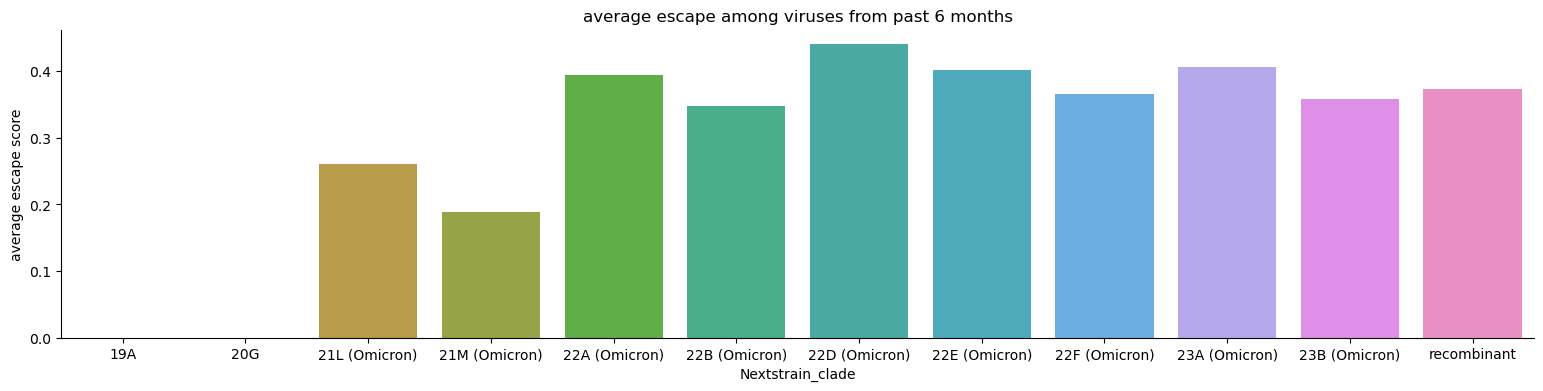

In [8]:
avg2_escape_data = recent_data.groupby('Nextstrain_clade').mean(numeric_only=True)
avg2_escape_data.reset_index(inplace=True)
plt.figure(figsize=[19,4])
sns.barplot(x='Nextstrain_clade', y='escape_score', data=avg2_escape_data)
plt.title('average escape among viruses from past 6 months')
plt.xlabel('Nextstrain_clade')
plt.ylabel('average escape score')
sns.despine()
plt.show()

Next, for each antibody group, we'll plot escape over time. To do this, we'll need to implement our sliding-window approach from before. First, we will define where our windows are.

In [9]:
# Define parameters for windows
start_time = 0
end_time = 3.3
window_width = 0.2
window_step_size = 0.1

# To start, we set the left side of our window at a value
# of zero
left_side_of_window = 0

# We're going to define all windows one at a time
# based on the step size and width
list_of_left_sides_of_windows = []
while left_side_of_window <= end_time:
    
    # Append the window value to the list
    list_of_left_sides_of_windows.append(left_side_of_window)
    #print(left_side_of_window, left_side_of_window+window_width)

    # Slide the window to the right by one step
    left_side_of_window = left_side_of_window + window_step_size
escape_df.head()

strain aa_substitutions  escape_score   antibody ab_group        date  \
0  ON641975.1              NaN      0.000000  BD55-6049       E3  2022-01-08   
1  ON641975.1      G446S N501Y      0.020197   BD56-965        B  2022-01-08   
2  ON641975.1              NaN      0.000000    XGv-318       F1  2022-01-08   
3  ON641975.1              NaN      0.000000  BD55-5687       E3  2022-01-08   
4  ON641975.1            E484A      0.005702    XGv-214     E2.1  2022-01-08   

  Nextstrain_clade      time  
0                ?  2.038356  
1                ?  2.038356  
2                ?  2.038356  
3                ?  2.038356  
4                ?  2.038356

Next, for each window, we will record data in that window.

In [10]:
# Make a dictionary for keeping track of averages in each window
window_data = defaultdict(list)

ab_groups = sorted(escape_df['ab_group'].unique())

# Iterate over each window and record data
dfs = []
for left_side_of_window in list_of_left_sides_of_windows:

    # Get the right side of the window
    right_side_of_window = left_side_of_window + window_width
   
    # Record data for specific antibody group
    for ab_group in ab_groups:
       
        # Get data for all rows in a given time window
        data = escape_df[
            (escape_df['time'].between(left_side_of_window, right_side_of_window)) &
            (escape_df['ab_group'] == ab_group)
        ].copy()

        # Compute the mean escape across all viruses for a given antibody
        data = data.groupby('antibody').mean(numeric_only=True)
        data['time'] = left_side_of_window
        data['ab_group'] = ab_group
        dfs.append(data)
           
ab_window_data = pd.concat(dfs)
ab_window_data.rename(columns={'escape_score' : 'mean_escape'}, inplace=True)
ab_window_data.reset_index(inplace=True)
print(ab_window_data.info())
ab_window_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91674 entries, 0 to 91673
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   antibody     91674 non-null  object 
 1   mean_escape  91674 non-null  float64
 2   time         91674 non-null  float64
 3   ab_group     91674 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.8+ MB
None


antibody  mean_escape  time ab_group
0      B38          0.0   0.0        A
1   BD-218          0.0   0.0        A
2   BD-236          0.0   0.0        A
3   BD-369          0.0   0.0        A
4   BD-395          0.0   0.0        A

In [ ]:
***** for new plot #i tried to do the sliding window thing but use the next strain claid so i could do the plot base
#based on that. not sure if its working, its taking forever

In [11]:
# Make a dictionary for keeping track of averages in each window
window_data2 = defaultdict(list)

Nextstrain_clades = sorted(escape_df['Nextstrain_clade'].unique())

# Iterate over each window and record data
dfs = []
for left_side_of_window in list_of_left_sides_of_windows:

    # Get the right side of the window
    right_side_of_window = left_side_of_window + window_width
   
    # Record data for specific antibody group
    for Nextstrain_clade in Nextstrain_clades:
       
        # Get data for all rows in a given time window
        data = escape_df[
            (escape_df['time'].between(left_side_of_window, right_side_of_window)) &
            (escape_df['Nextstrain_clade'] == Nextstrain_clade)
        ].copy()

        # Compute the mean escape across all viruses for a given antibody
        data = data.groupby('antibody').mean(numeric_only=True)
        data['time'] = left_side_of_window
        data['Nextstrain_clade'] = Nextstrain_clade
        dfs.append(data)
           
ab_window_data2 = pd.concat(dfs)
ab_window_data2.rename(columns={'escape_score' : 'mean_escape'}, inplace=True)
ab_window_data2.reset_index(inplace=True)
print(ab_window_data2.info())
ab_window_data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730614 entries, 0 to 730613
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   antibody          730614 non-null  object 
 1   mean_escape       730614 non-null  float64
 2   time              730614 non-null  float64
 3   Nextstrain_clade  730614 non-null  object 
dtypes: float64(2), object(2)
memory usage: 22.3+ MB
None


antibody  mean_escape  time Nextstrain_clade
0     1-57     0.000000   0.0              19A
1     2-15     0.000000   0.0              19A
2      7D6     0.000000   0.0              19A
3    ADG-2     0.047047   0.0              19A
4      B38     0.000000   0.0              19A

In [ ]:
***** for new plot ^^^^

In [ ]:
for each left side --> get each unique clade and its amount. put that in a list of maps. each timepoint is a list 
a cell for the time point and a cell for the map {unique_clade: amount of that clade in that time point} 

In [12]:
# Group by 'time' and 'Nextstrain_clade' and count the number of occurrences for each clade within each time point.
grouped_data = ab_window_data2.groupby(['time', 'Nextstrain_clade'])

In [24]:
# Create an empty list to store our results
result_list = []

# Loop through each group
for time_clade, group_d in ab_window_data2.groupby(['time', 'Nextstrain_clade']):
   
    # Extract the time and clade values
    time, clade = time_clade
    
    # Get the count of the group
    count = len(group_d)
    
    # Append the results to our list
    result_list.append({'time': time, 'Nextstrain_clade': clade, 'count': count})

# Convert the list of dictionaries into a DataFrame
result_df = pd.DataFrame(result_list)

print(result_df)


     time Nextstrain_clade  count
0     0.0              19A   2778
1     0.0              19B   2778
2     0.0              20A   2778
3     0.0              20C   2778
4     0.0              20G   2778
..    ...              ...    ...
258   3.2    22D (Omicron)   2778
259   3.2    22E (Omicron)   2778
260   3.2    22F (Omicron)   2778
261   3.2    23A (Omicron)   2778
262   3.2    23B (Omicron)   2778

[263 rows x 3 columns]


In [19]:
print(ab_window_data2)

       antibody  mean_escape  time Nextstrain_clade
0          1-57     0.000000   0.0              19A
1          2-15     0.000000   0.0              19A
2           7D6     0.000000   0.0              19A
3         ADG-2     0.047047   0.0              19A
4           B38     0.000000   0.0              19A
...         ...          ...   ...              ...
730609  XGv-416     1.000000   3.2    23B (Omicron)
730610  XGv-418     0.060050   3.2    23B (Omicron)
730611  XGv-420     0.940518   3.2    23B (Omicron)
730612  XGv-421     1.000000   3.2    23B (Omicron)
730613  XGv-422     0.041769   3.2    23B (Omicron)

[730614 rows x 4 columns]


In [11]:
# Create a list to store your results
result_list = []

# Iterate over each unique time point
for time_point in grouped_data['time'].unique():
    
    # Create a dictionary for each time point
    time_dict = {}
    time_dict['time'] = time_point
    
    # Filter data for the current time point
    current_time_data = grouped_data[grouped_data['time'] == time_point]
    
    # Create a dictionary with clades as keys and their counts as values
    clade_dict = {}
    for index, row in current_time_data.iterrows():
        clade_dict[row['Nextstrain_clade']] = row['counts']
    
    time_dict['clade_data'] = clade_dict
    
    # Append the dictionary to the result list
    result_list.append(time_dict)

# Print the result
for entry in result_list:
    print(entry)

{'time': 0.0, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20C': 2778, '20G': 2778, '21K (Omicron)': 2778}}
{'time': 0.1, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778, '21K (Omicron)': 2778}}
{'time': 0.2, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778}}
{'time': 0.30000000000000004, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778, '20F': 2778}}
{'time': 0.4, 'clade_data': {'19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778, '20F': 2778, '20G': 2778}}
{'time': 0.5, 'clade_data': {'19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778, '20E (EU1)': 2778, '20F': 2778, '20G': 2778}}
{'time': 0.6, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778, '20E (EU1)': 2778, '20G': 2778}}
{'time': 0.7, 'clade_data': {'19A': 2778, '19B': 2778, '20A': 2778, '20B': 2778, '20C': 2778, '20D': 2778

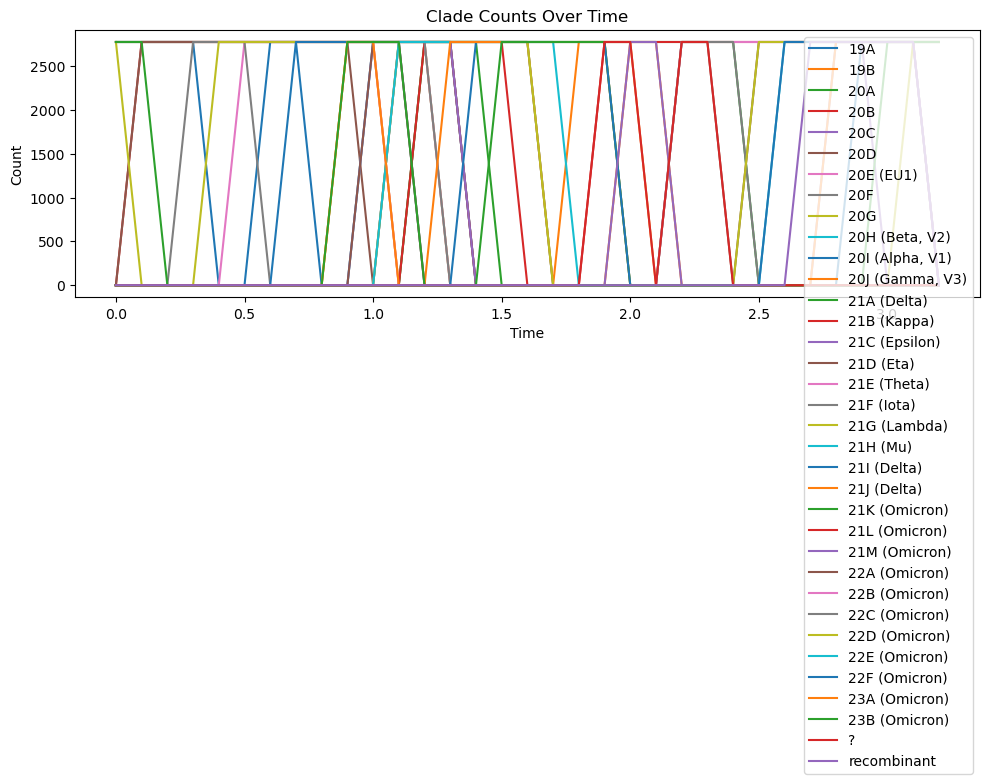

In [12]:
import matplotlib.pyplot as plt

# Extract unique clades for legend and color purposes
unique_clades = Nextstrain_clades

# Setting up the plot
plt.figure(figsize=(10, 6))

# Iterate over each unique clade to plot its counts over time
for clade in unique_clades:
    times = [entry['time'] for entry in result_list]
    counts = [entry['clade_data'].get(clade, 0) for entry in result_list]  # get function returns 0 if clade not present
    
    plt.plot(times, counts, label=clade)

# Setting up plot details
plt.title('Clade Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


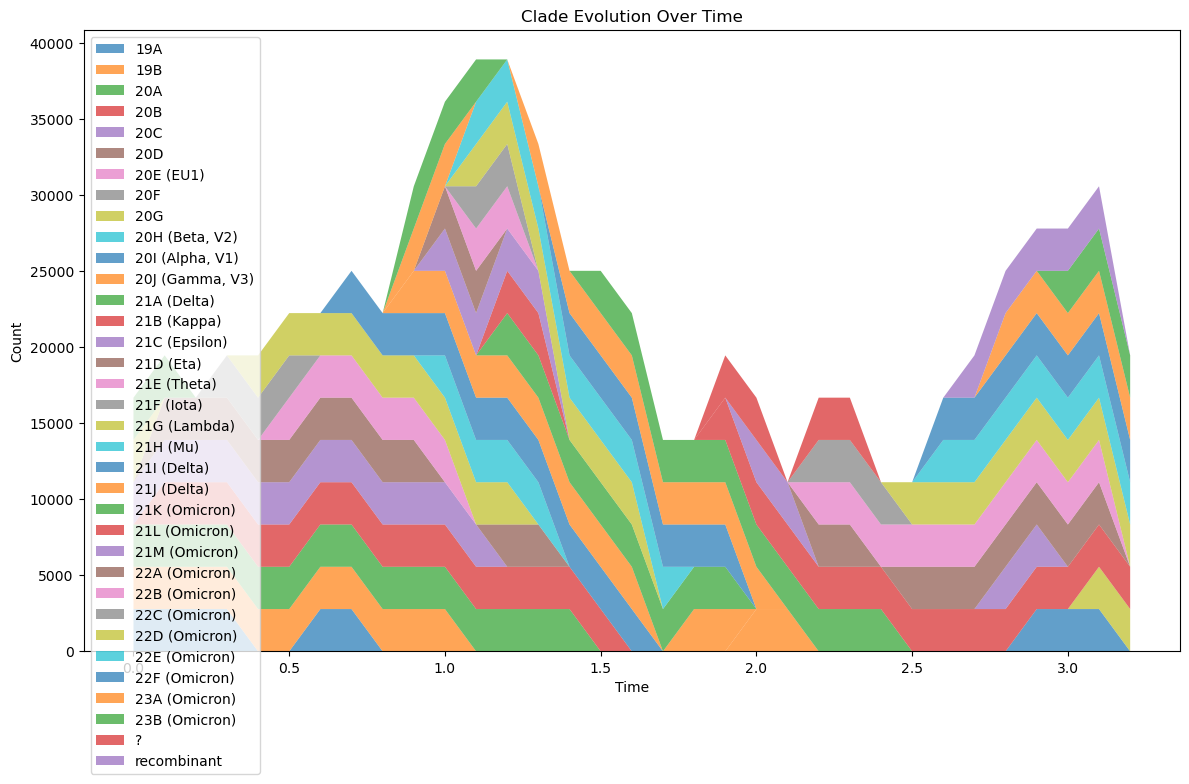

In [13]:
import matplotlib.pyplot as plt

# Extract unique clades for legend and color purposes
unique_clades = Nextstrain_clades  # as you've defined this earlier in the code

# Setting up the plot
plt.figure(figsize=(12, 8))

# Generate data for stackplot
times = [entry['time'] for entry in result_list]
all_counts = [[entry['clade_data'].get(clade, 0) for entry in result_list] for clade in unique_clades]

# Create stacked area chart
plt.stackplot(times, *all_counts, labels=unique_clades, alpha=0.7)

# Setting up plot details
plt.title('Clade Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


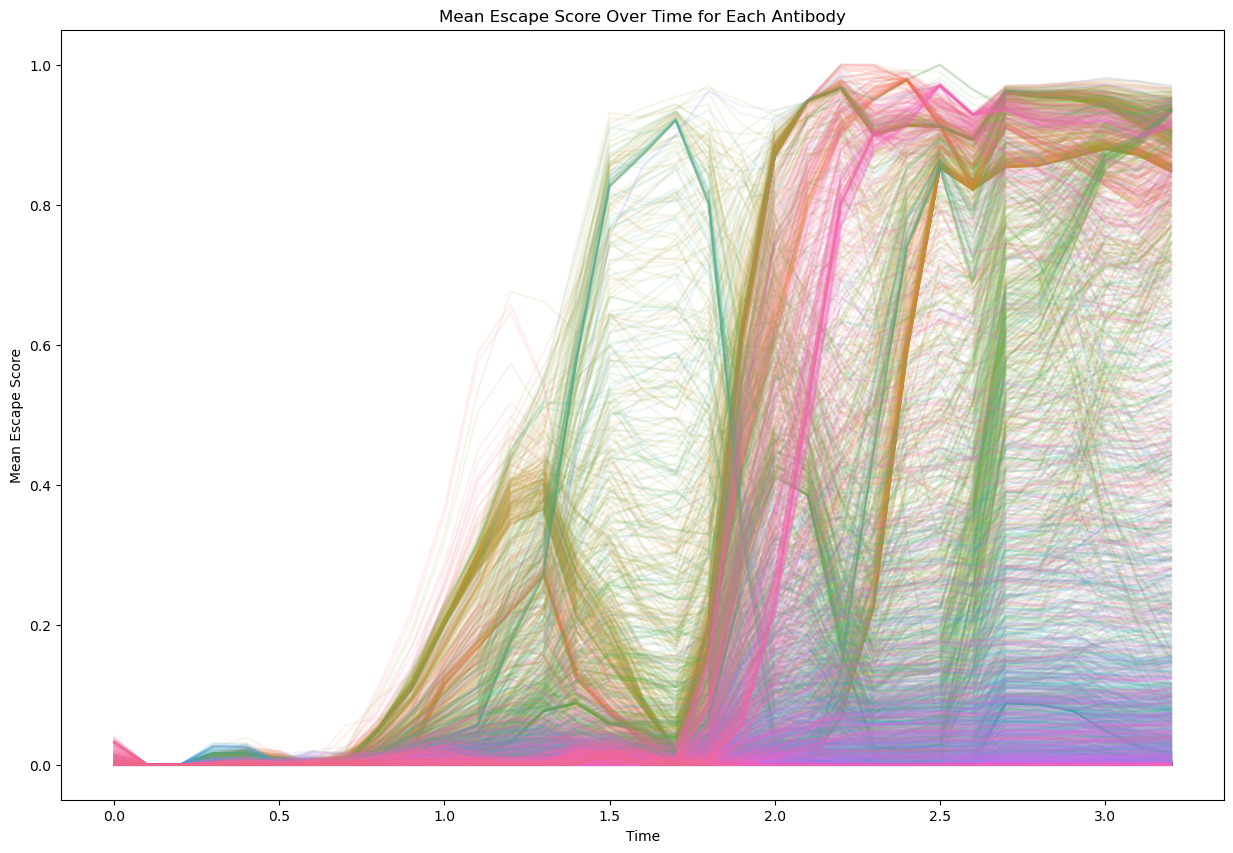

In [16]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=ab_window_data, x='time', y='mean_escape', hue='antibody', legend=False, alpha=.1)

plt.title('Mean Escape Score Over Time for Each Antibody')
plt.xlabel('Time')
plt.ylabel('Mean Escape Score')
plt.show()


/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature nam

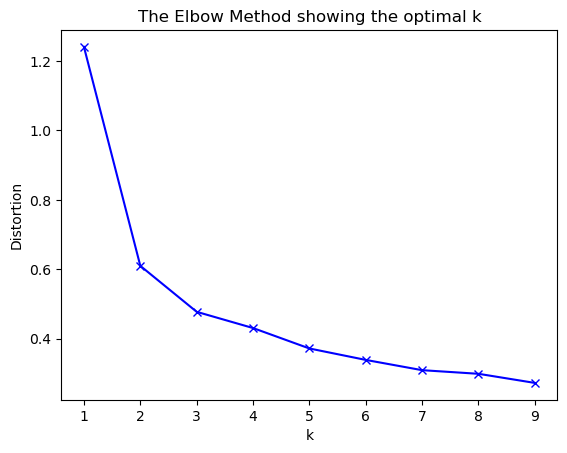

/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


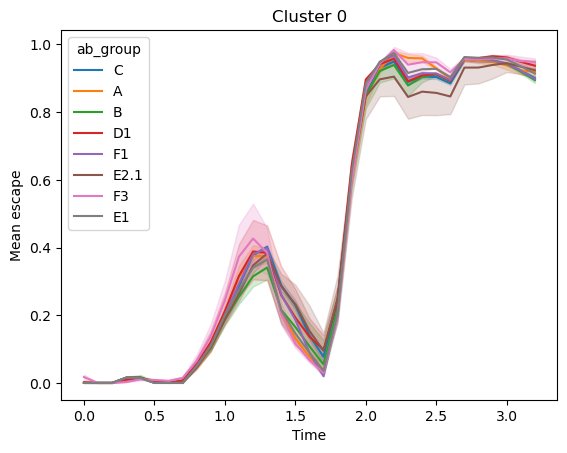

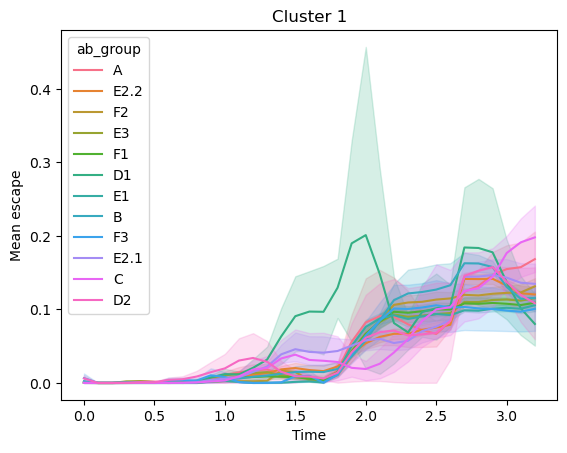

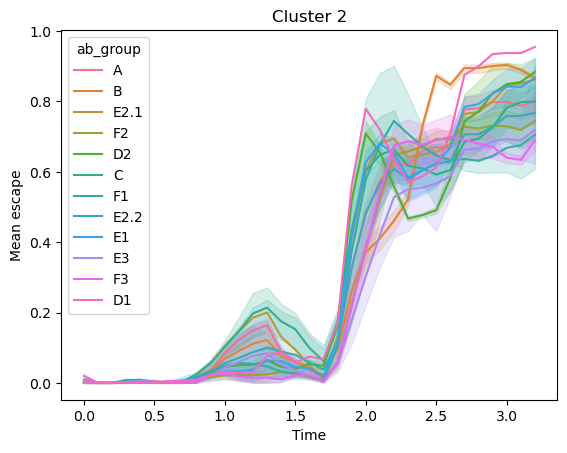

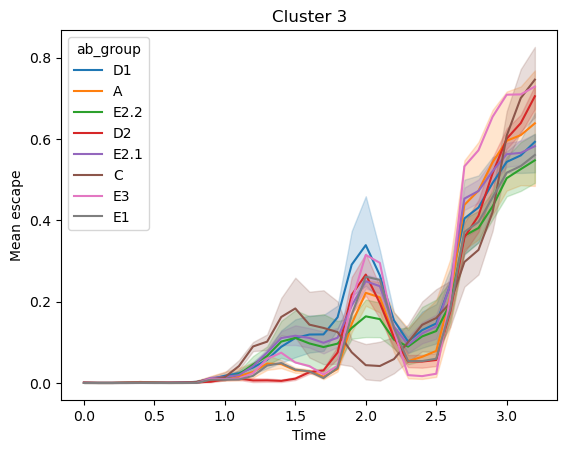

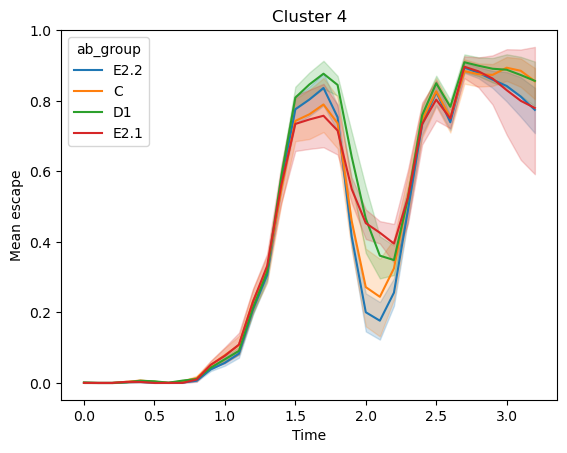

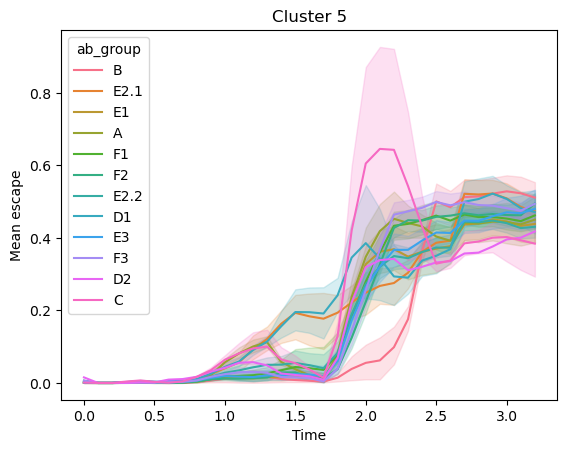

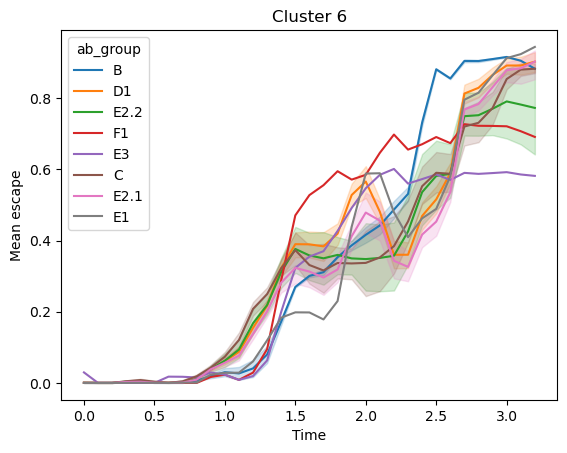

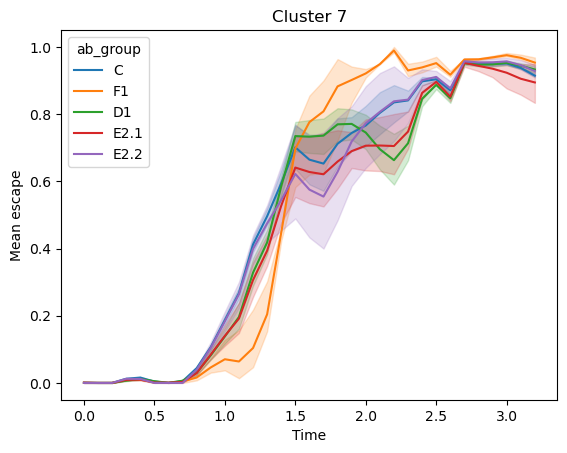

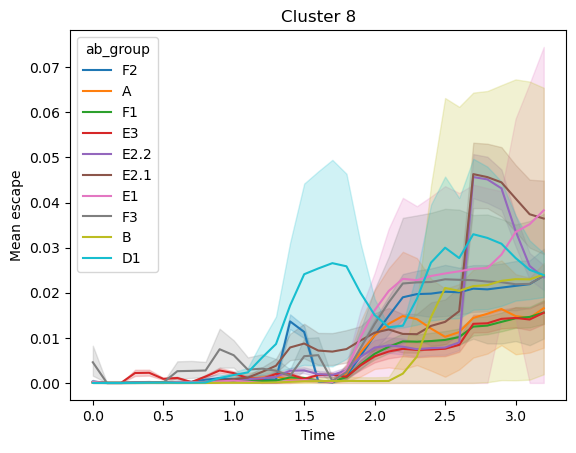

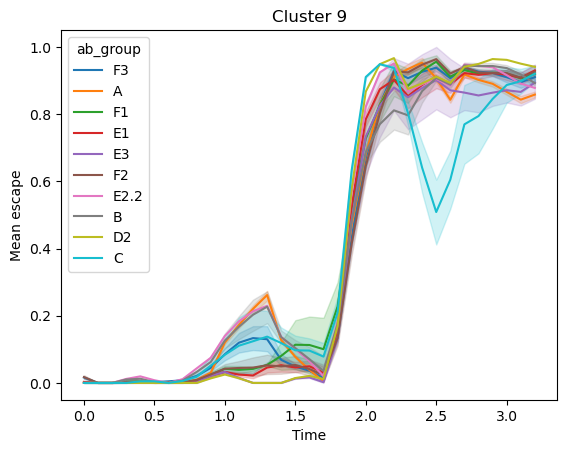

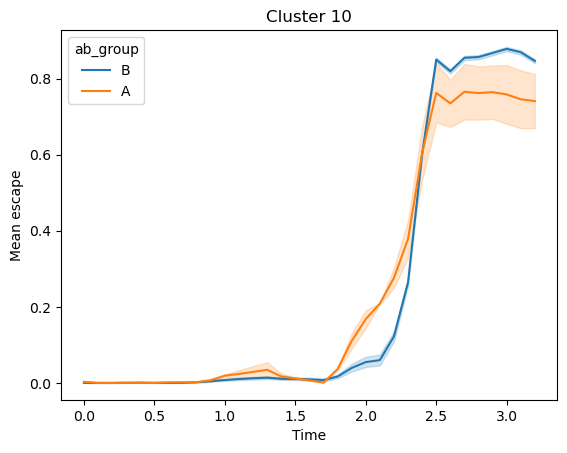

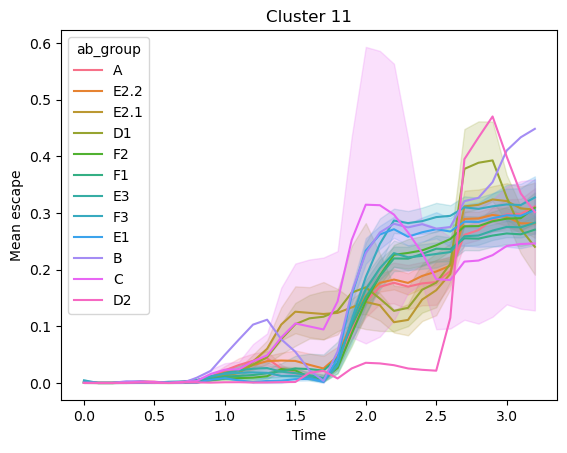

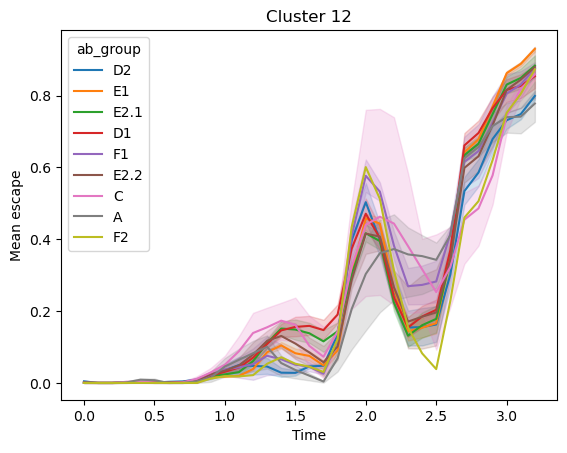

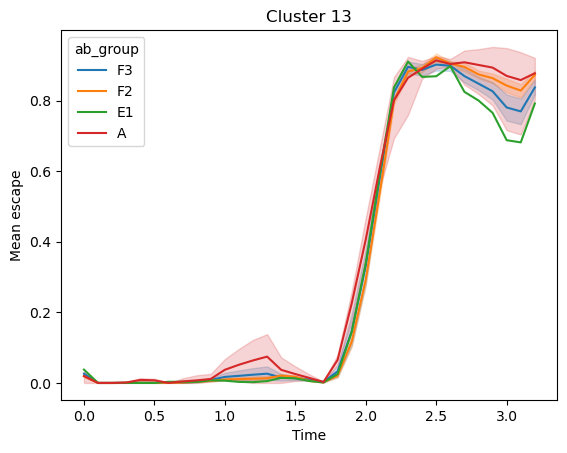

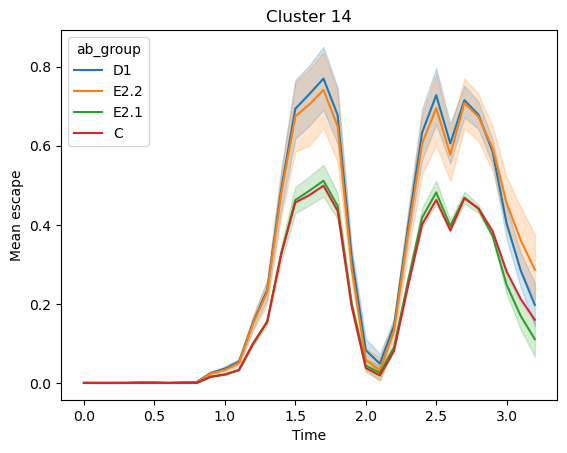

In [17]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Pivot your dataframe to have one row per antibody and one column per time point
pivot_df = ab_window_data.pivot(index=['antibody', 'ab_group'], columns= 'time', values='mean_escape').fillna(0)


# Compute optimal number of clusters using Elbow method
distortions = []
K = range(1,10) # This range can be adjusted depending on use case
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(pivot_df)
    distortions.append(sum(np.min(cdist(pivot_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pivot_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Pick the optimal number of clusters by examining the elbow plot
n_clusters = 15 # change this based on your elbow plot result

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_df)

# Add the cluster labels back into the pivot dataframe
pivot_df['cluster'] = kmeans.labels_

# For each cluster, plot all the antibodies in the cluster
for cluster in range(n_clusters):
    cluster_df = pivot_df[pivot_df['cluster'] == cluster].drop(columns='cluster').reset_index()
    cluster_df = cluster_df.melt(id_vars=['ab_group', 'antibody'])
    cluster_df.time = cluster_df.time.astype(float)
    sns.lineplot(data =cluster_df, x = 'time', y = 'value', hue= 'ab_group')
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Mean escape')
    plt.show()
    
#plot epotope group nmames in the cluster for each line 

In [25]:
antibody_cluster_df = pivot_df.reset_index()[['antibody', 'cluster']]

print(antibody_cluster_df)

time antibody  cluster
0        1-57        3
1        2-15        0
2         7D6        0
3       ADG-2       13
4         B38        0
...       ...      ...
2773  XGv-416        9
2774  XGv-418        8
2775  XGv-420       12
2776  XGv-421        9
2777  XGv-422        8

[2778 rows x 2 columns]


/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature nam

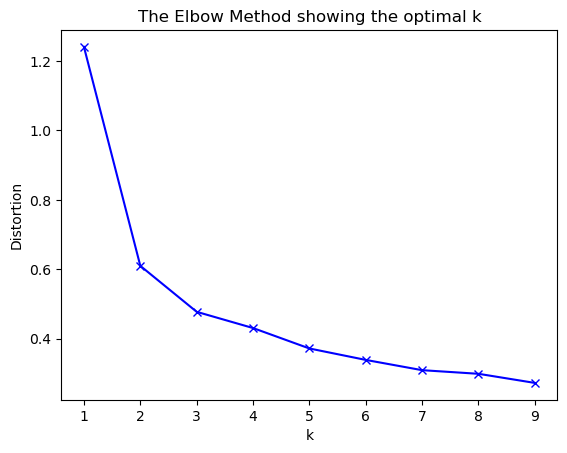

/home/oabdelaz/miniconda3/envs/ncov-ab-escape/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


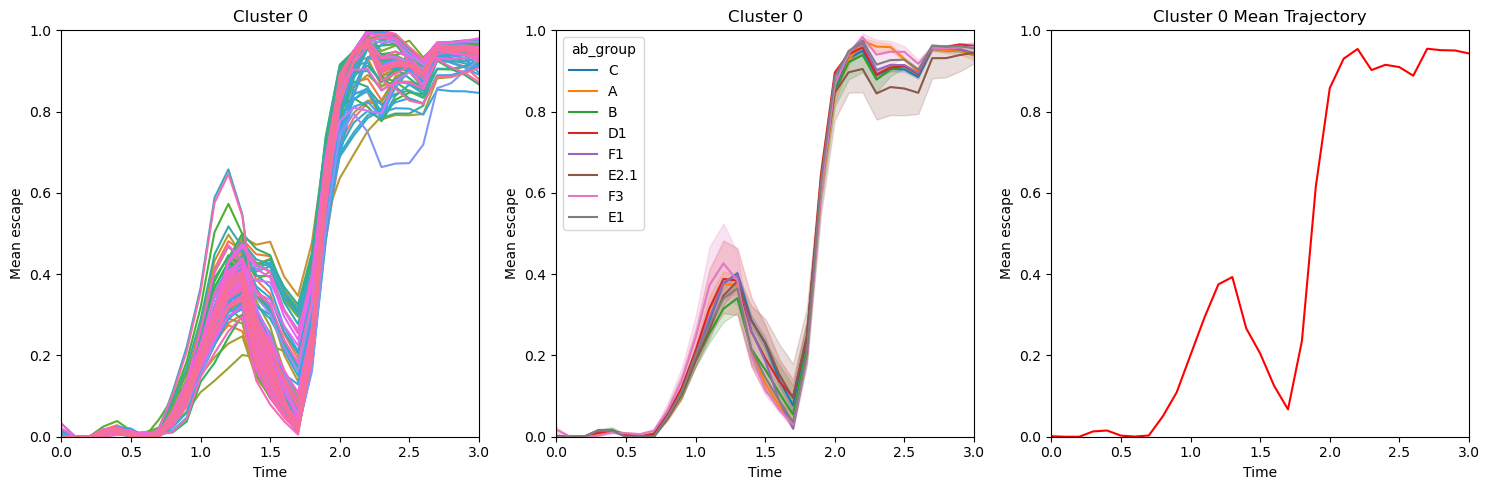

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


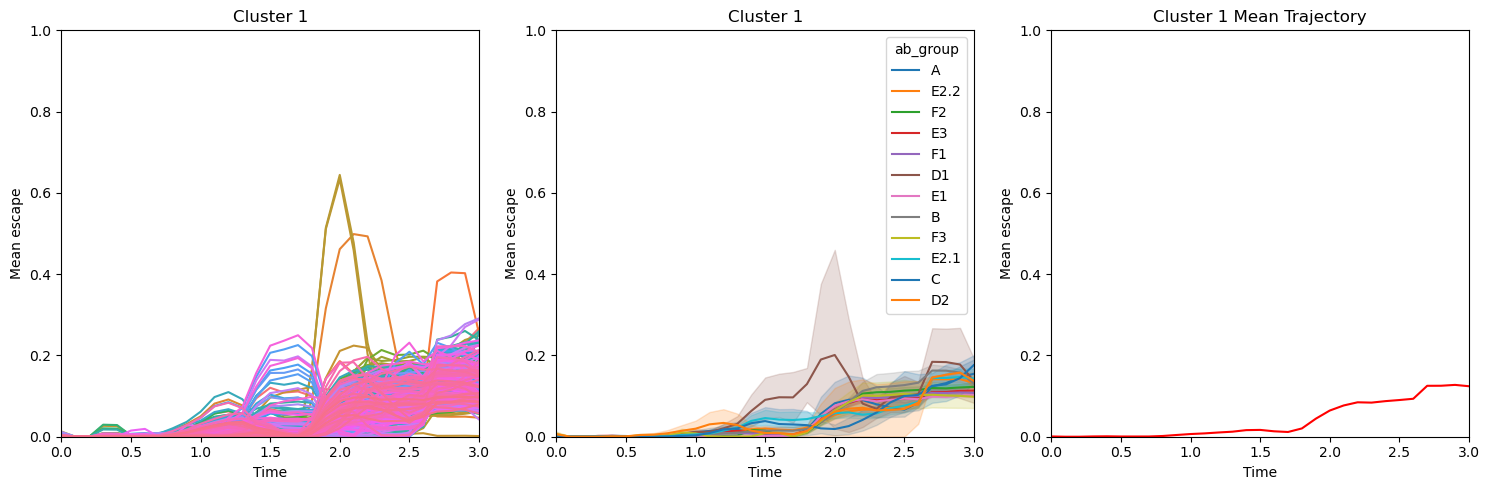

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


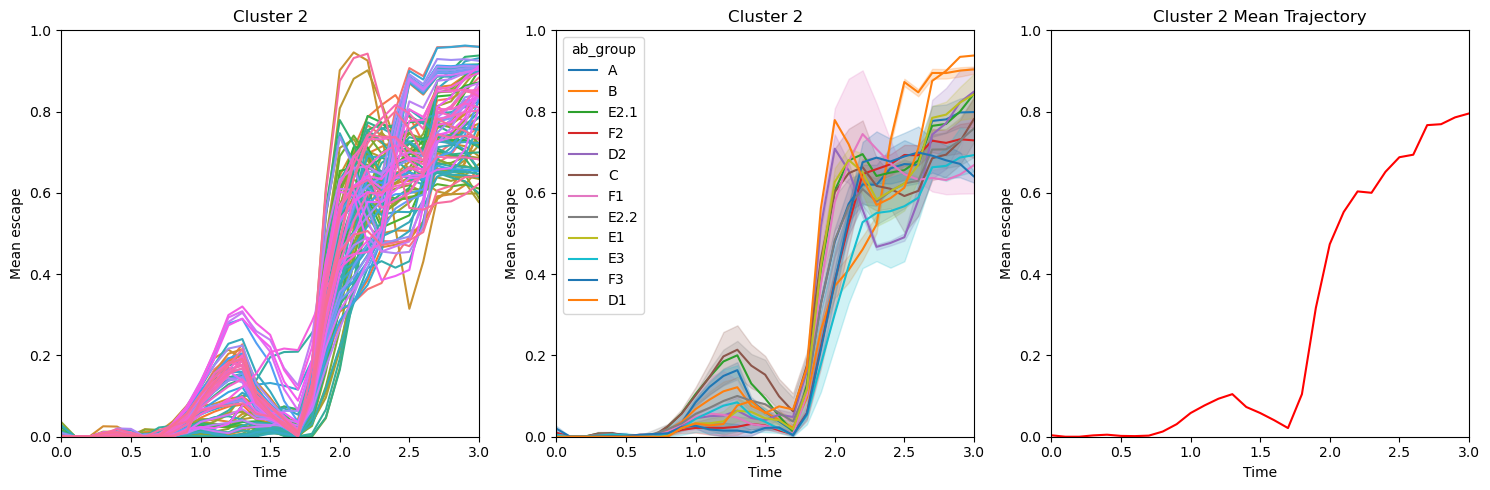

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


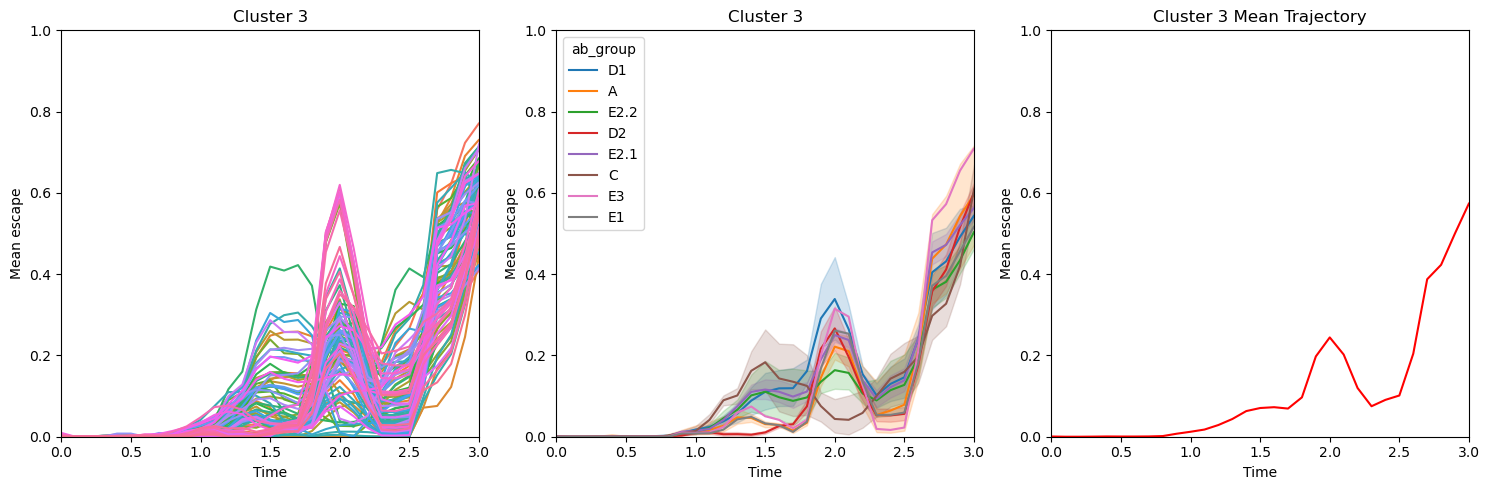

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


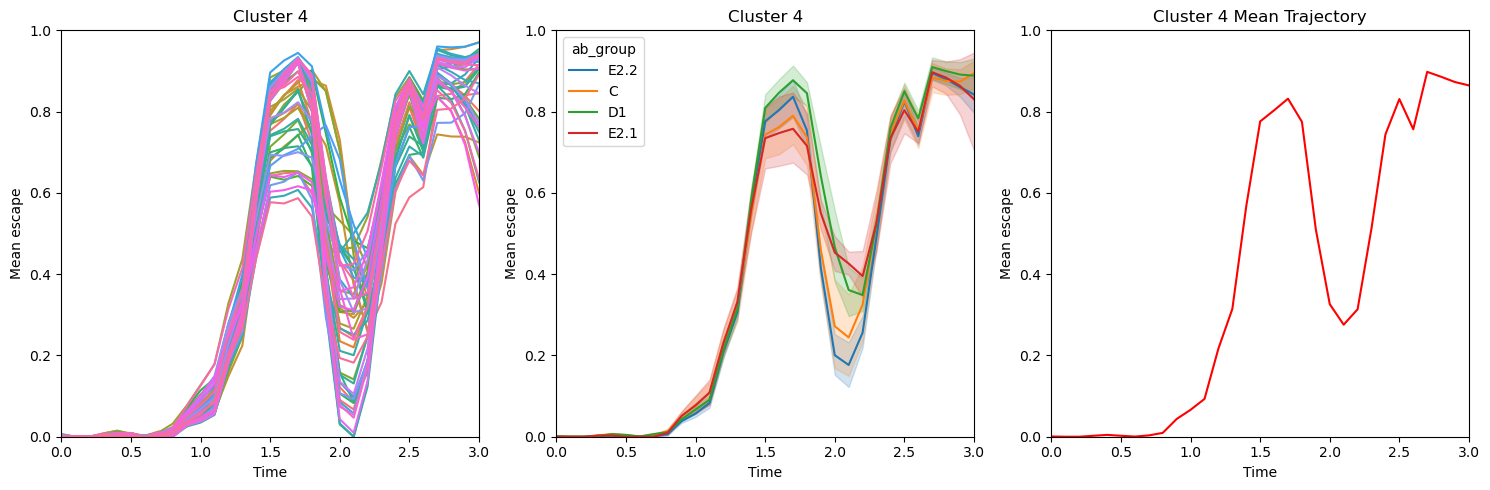

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


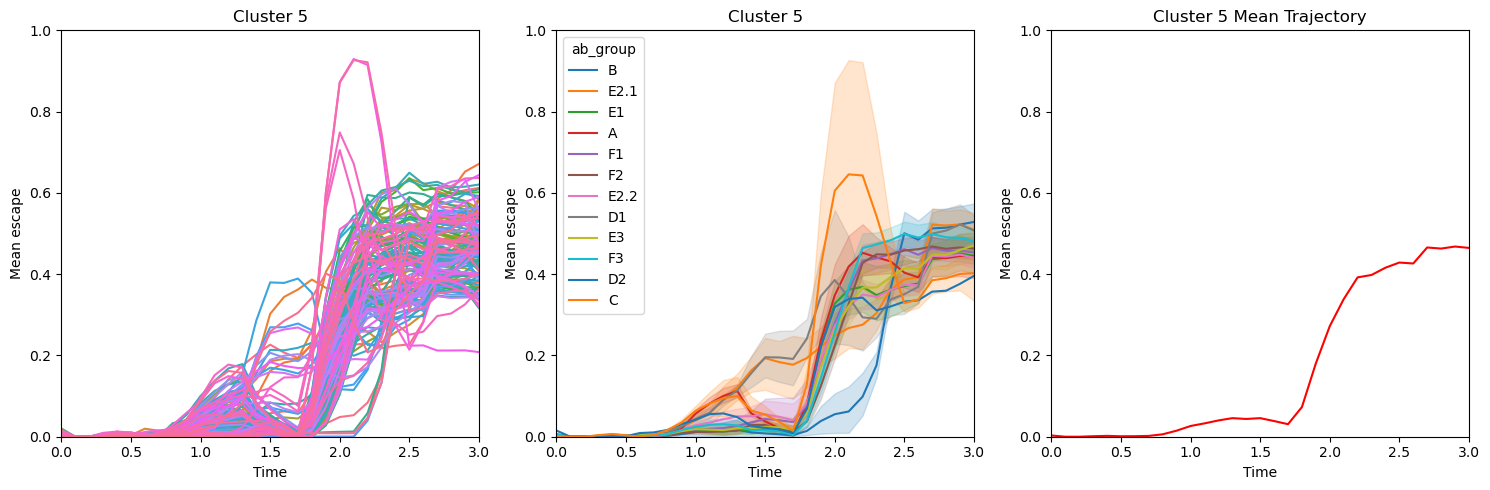

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


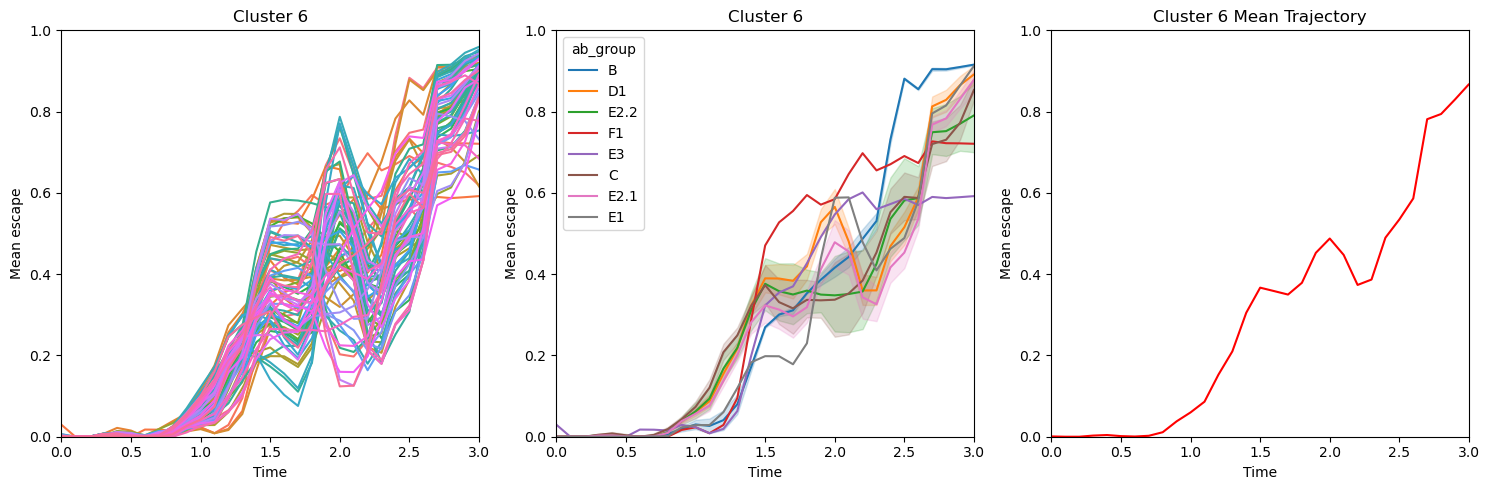

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


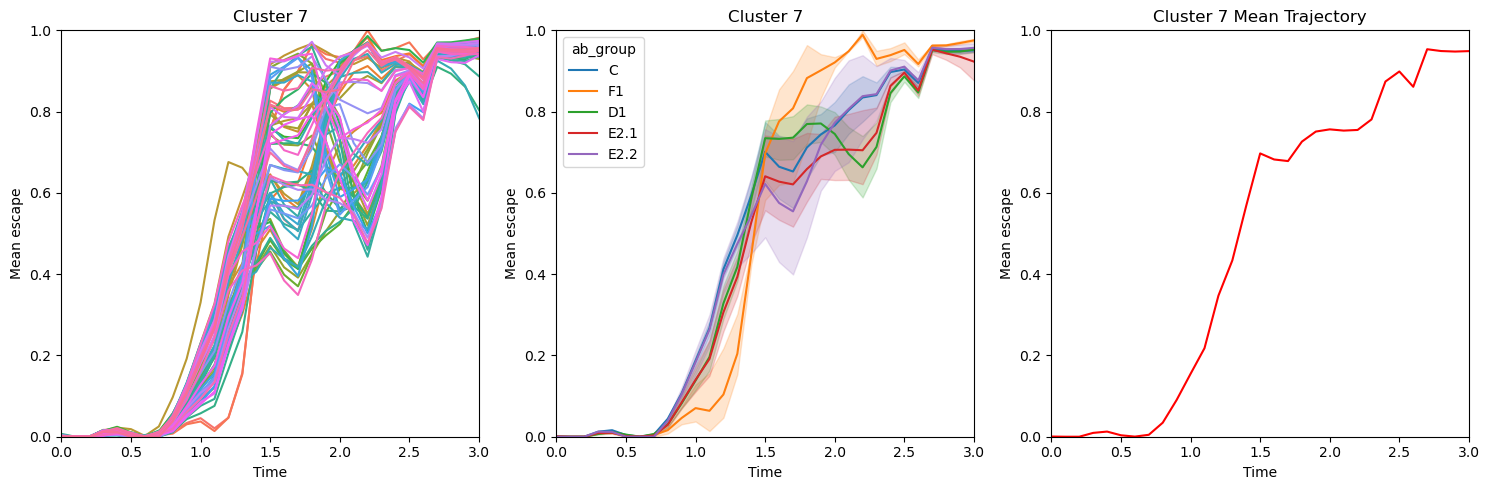

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


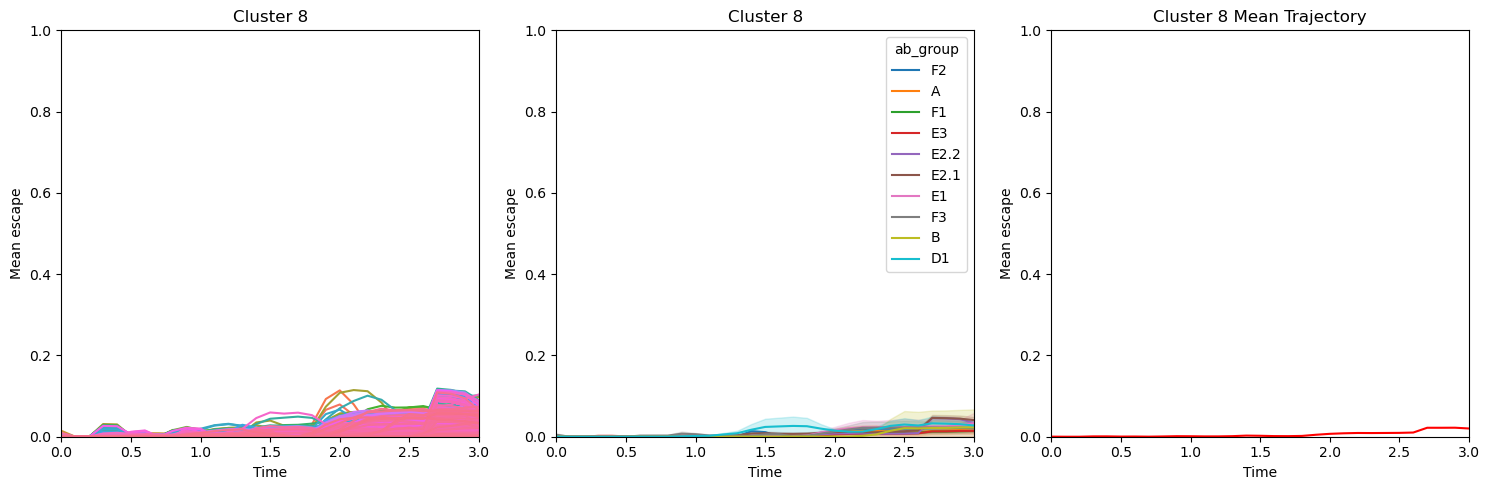

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


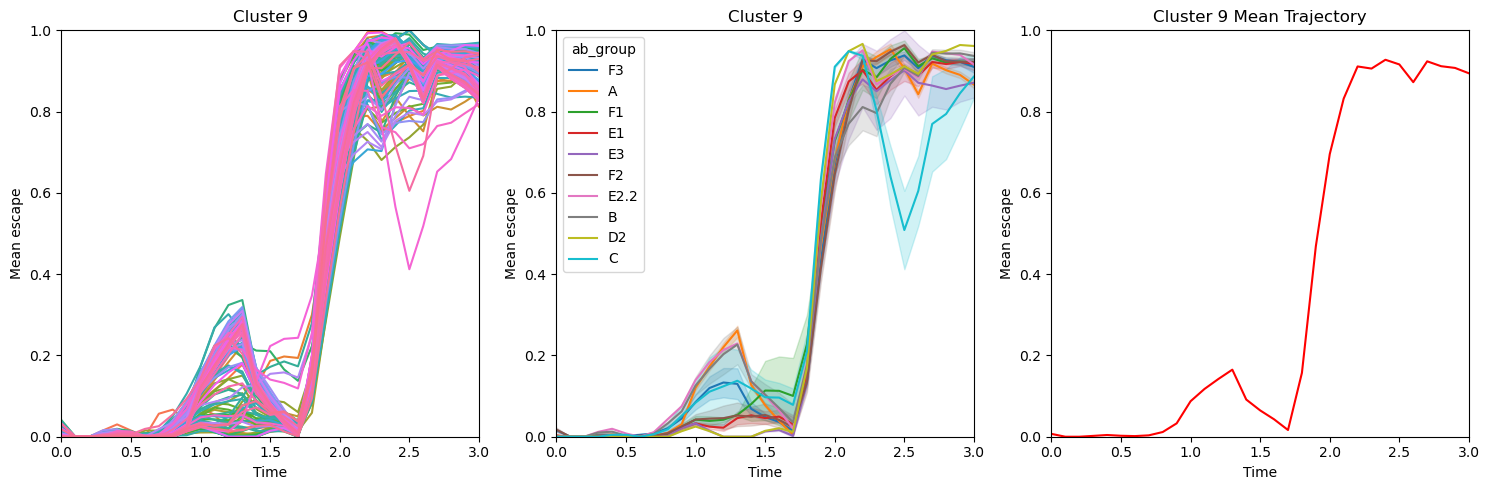

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


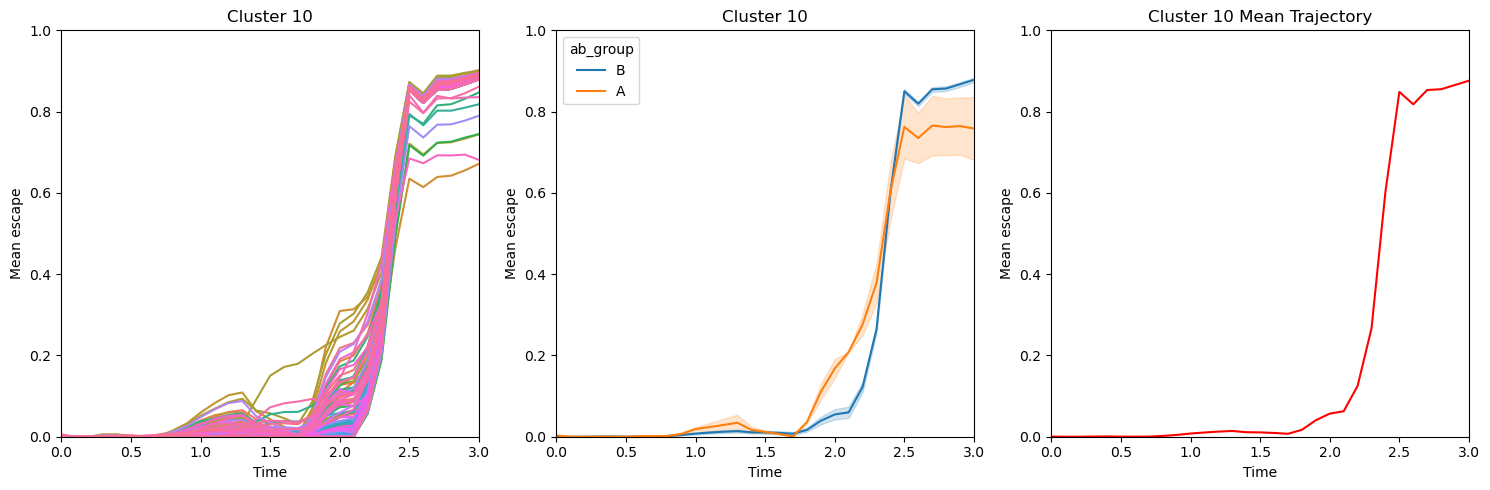

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


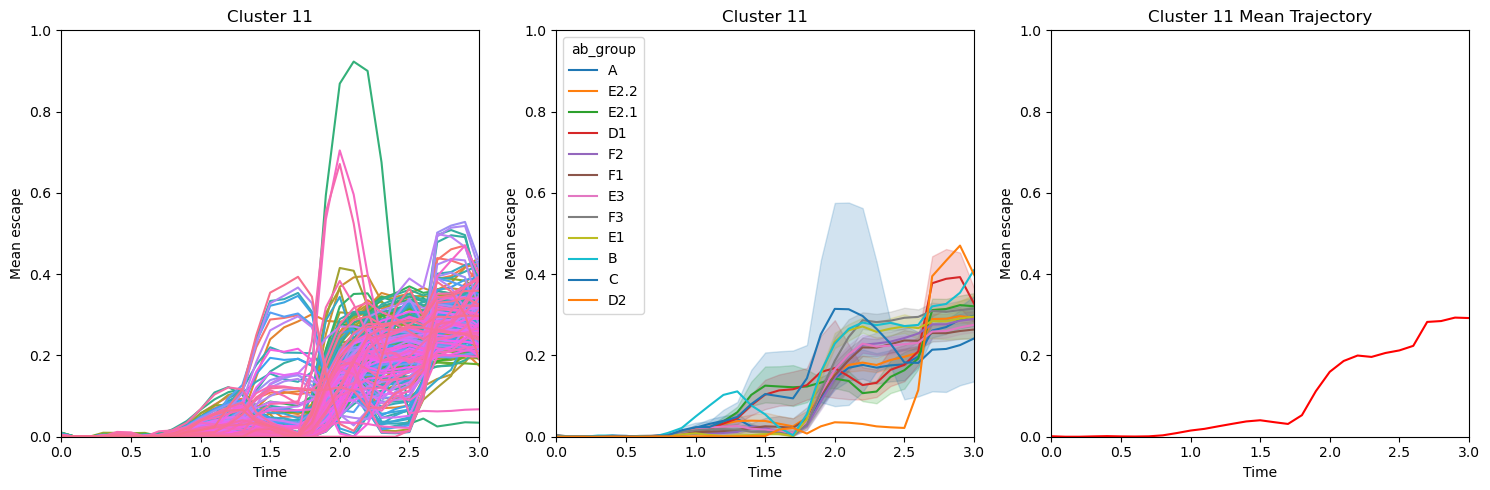

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


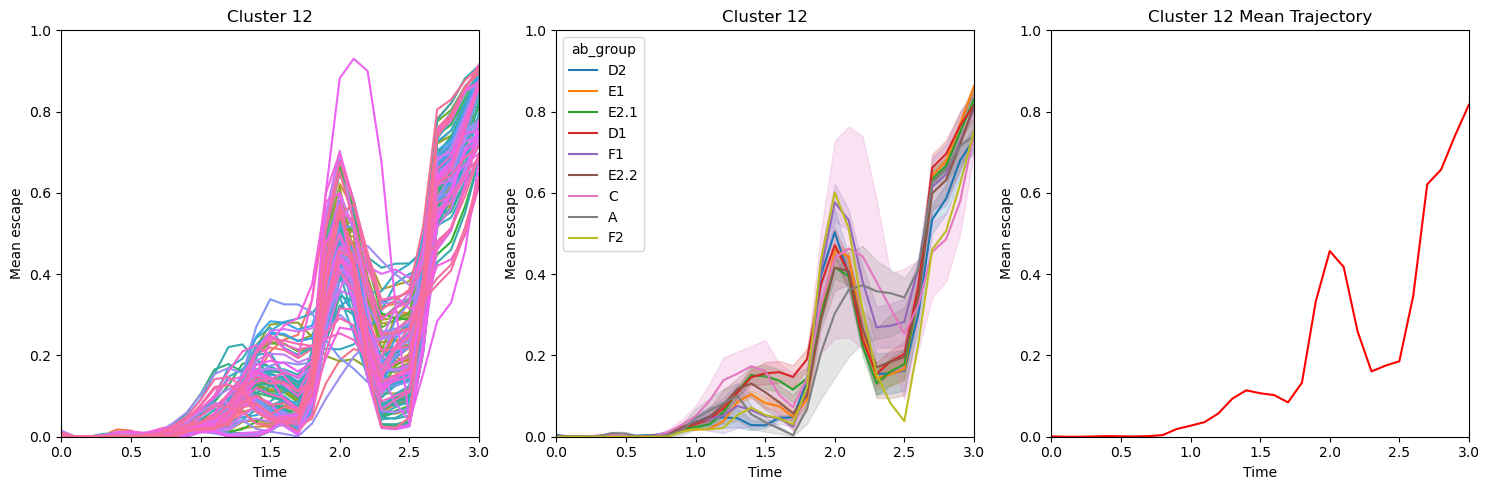

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


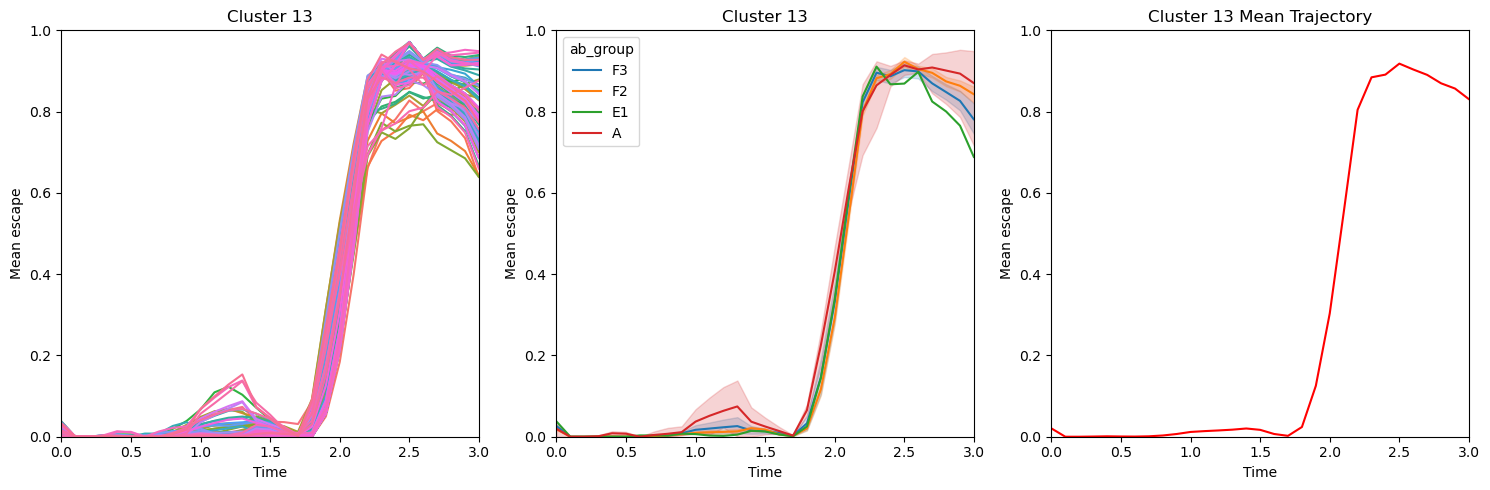

/tmp/ipykernel_9463/525718042.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])


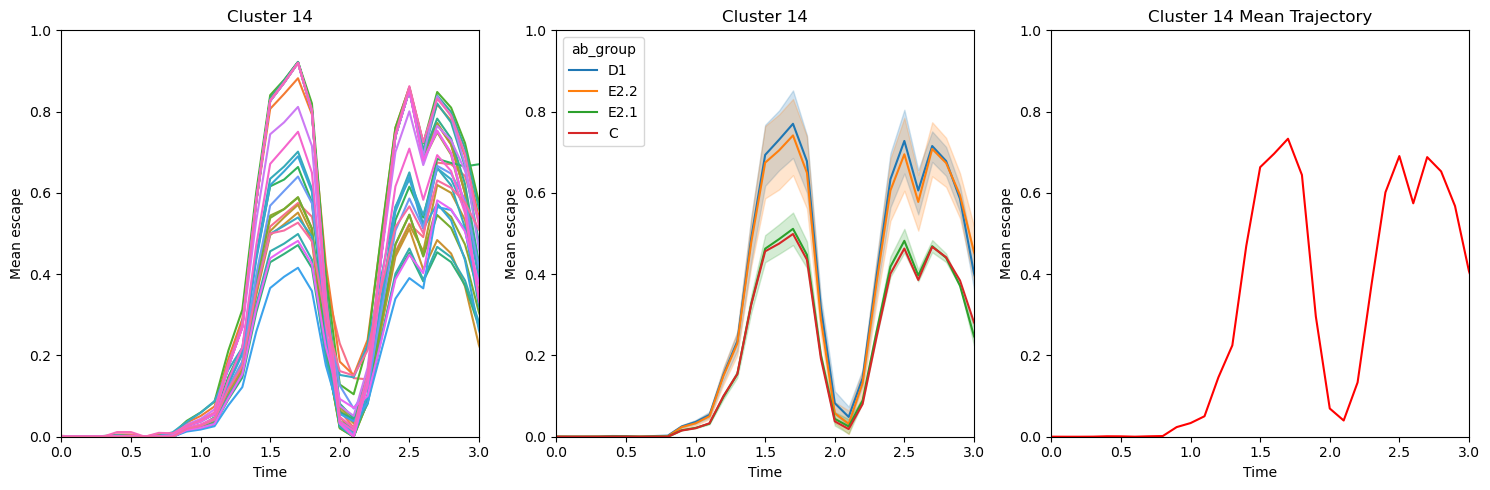

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Pivot your dataframe to have one row per antibody and one column per time point
pivot_df = ab_window_data.pivot(index=['antibody', 'ab_group'], columns= 'time', values='mean_escape').fillna(0)

# Compute optimal number of clusters using Elbow method
distortions = []
K = range(1,10) # This range can be adjusted depending on use case
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(pivot_df)
    distortions.append(sum(np.min(cdist(pivot_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pivot_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Pick the optimal number of clusters by examining the elbow plot
n_clusters = 15 # change this based on your elbow plot result

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_df)

# Add the cluster labels back into the pivot dataframe
pivot_df['cluster'] = kmeans.labels_

# For each cluster, plot all the antibodies in the cluster
for cluster in range(n_clusters):
    cluster_df = pivot_df[pivot_df['cluster'] == cluster].drop(columns='cluster').reset_index()
    cluster_df = cluster_df.melt(id_vars=['ab_group', 'antibody'])
    cluster_df.time = cluster_df.time.astype(float)
    
    # Start subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
    
    sns.lineplot(data=cluster_df, x='time', y='value', hue='antibody', ax=axs[0],legend=False)
    axs[0].set_title(f'Cluster {cluster}')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Mean escape')

    sns.lineplot(data=cluster_df, x='time', y='value', hue='ab_group', palette='tab10', ax=axs[1])
    axs[1].set_title(f'Cluster {cluster}')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Mean escape')

    sns.lineplot(data=cluster_df, x='time', y='value', ci=None, estimator=np.mean, color='r', ax=axs[2])
    axs[2].set_title(f'Cluster {cluster} Mean Trajectory')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Mean escape')

    # set x and y axis limits
    axs[0].set_xlim([0, 3]) 
    axs[0].set_ylim([0, 1])
    axs[1].set_xlim([0, 3]) 
    axs[1].set_ylim([0, 1])
    axs[2].set_xlim([0, 3]) 
    axs[2].set_ylim([0, 1])
    

    
    plt.tight_layout()
    plt.show()


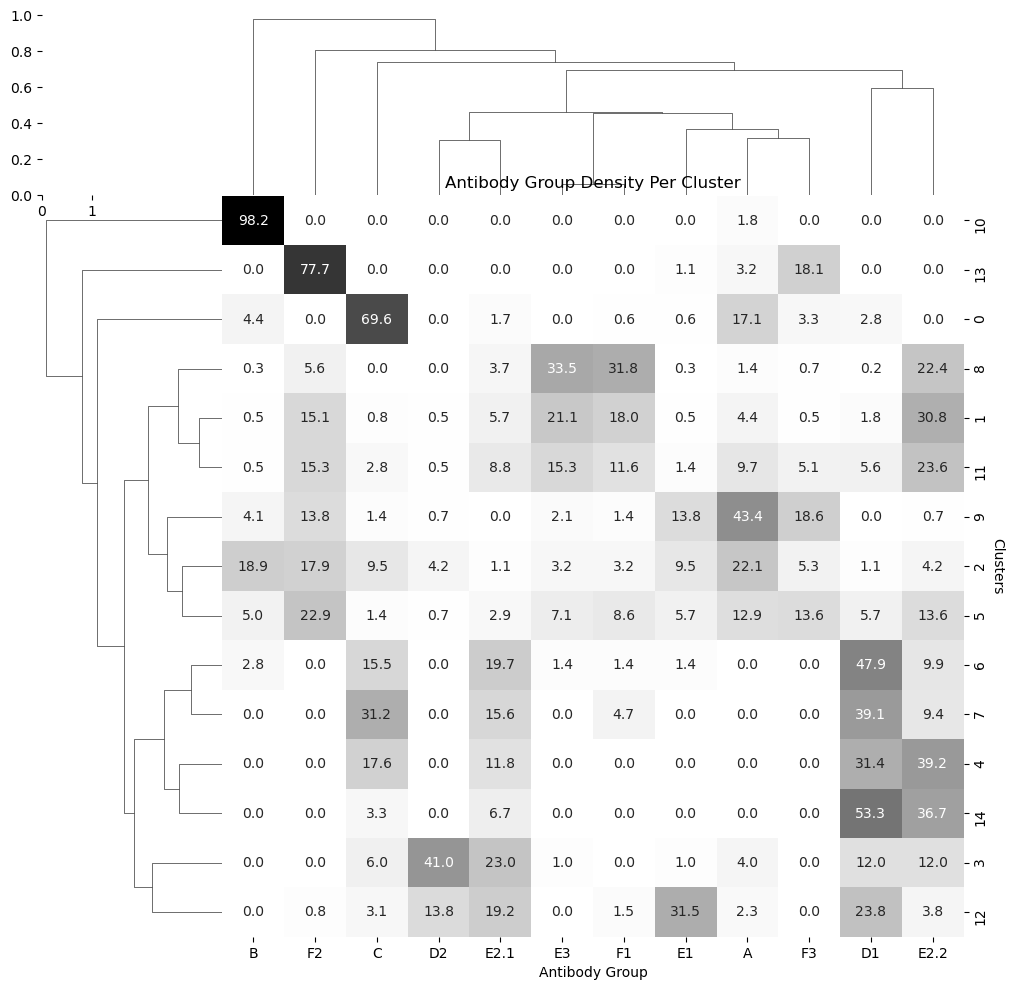

In [13]:
import matplotlib.colors as colors
import seaborn as sns

# Create a new dataframe to hold cluster vs ab_group counts
cluster_ab_group_df = pivot_df.groupby(['cluster', 'ab_group']).size().unstack(fill_value=0)

# Now, normalize the counts to represent fractions within each cluster
cluster_ab_group_df = cluster_ab_group_df.div(cluster_ab_group_df.sum(axis=1), axis=0)

# Convert fractions to percentages
cluster_ab_group_df = cluster_ab_group_df * 100
# Making a color gradient
cmap = colors.LinearSegmentedColormap.from_list("mycmap", ["white", "black"])

# Initializing the ClusterMap
g = sns.clustermap(cluster_ab_group_df, annot=True, fmt=".1f", row_cluster=True, col_cluster=True, cmap=cmap, cbar=False)




# Making x-axis label on bottom
g.ax_heatmap.set_xlabel('Antibody Group') 




# Making y-axis label on the right
g.ax_heatmap.set_ylabel('Clusters', rotation=-90, va="baseline")

# Setting the title for the clustermap
g.ax_heatmap.set_title('Antibody Group Density Per Cluster')

plt.show()

In [32]:
#window_data = pd.DataFrame(pivot_df)
window_data = pd.DataFrame(window_data)
#cluster_ab_group_df.head()
window_data.head()

Empty DataFrame
Columns: []
Index: []

In [28]:
sns.lineplot(
    x='left_side', y='mean_escape', data=window_data,
    hue='antibody_group', palette='colorblind'
)
plt.legend()
plt.xlabel('time')
plt.ylabel('average escape')
sns.despine()
plt.show()

ValueError: Could not interpret value `left_side` for parameter `x`

Let's make these plots in the future
* plot showing average escape of viruses for each antibody in each group, and having different graphs for different antibody groups

* for each antibody group, analyze patterns by clade

Here's a way to "pivot" the dataframe so that it's the same format we had before with the 5-10 antibodies.

In [ ]:
data = escape_df.pivot_table(
    index=['strain', 'date'],
    columns=['antibody'],
    values=['escape_score']
)
data.head()


In this dataframe, each row is a virus, and each column gives some information for that virus
* `strain`: the name of the virus
* `aa_substitutions`: gives the mutation(s) in the virus
* `escape_score`: the amount that a virus has escaped a given antibody. this score starts at zero (no escape) and can go up to 1.0, or even larger sometimes.
* `antibody`: this gives the name of the antibody associated with a given escape score.
* `ab_group`: the group a given antibody is in. Antibodies in the same group target a similar region of the spike protein.
* `date`: the date that a virus was isolated.
* `time`: the same as date, but it is the number of years that have elapsed since the beginning of the pandemic.

In [ ]:
antibodies = data.columns.get_level_values('antibody').unique().tolist()
print(antibodies)


In [ ]:
import matplotlib.pyplot as plt

# Collapse multi-level column index to single-level
data.columns = data.columns.get_level_values(1)

# Calculate the mean escape score across all antibodies for each date
mean_escape_scores = data.mean(axis=1).reset_index(level='date')

# Create a new dataframe with date as a column instead of index
mean_escape_scores.reset_index(inplace=True)

# Convert date column to datetime format for proper plotting
mean_escape_scores['date'] = pd.to_datetime(mean_escape_scores['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_escape_scores['date'], mean_escape_scores[0])
plt.xlabel('Date')
plt.ylabel('Mean Escape Score')
plt.title('Mean Escape Score Over Time')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Convert the 'strain' and 'antibody' multi-index into a single index
data_flat = data.copy()
data_flat.columns = [f"{i}_{j}" for i, j in data.columns]

# Compute mean escape score per date
mean_escape_df = data_flat.mean(axis=1).reset_index()

# Pivot dataframe to have one row per antibody and one column per time point
pivot_df = mean_escape_df.pivot(index='strain', columns='date', values=0).fillna(0)

# Compute optimal number of clusters using Elbow method
distortions = []
K = range(1,10) # This range can be adjusted depending on use case
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(pivot_df)
    distortions.append(sum(np.min(cdist(pivot_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pivot_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Pick the optimal number of clusters by examining the elbow plot
n_clusters = 3 # change this based on your elbow plot result

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_df)

# Add the cluster labels back into the pivot dataframe
pivot_df['cluster'] = kmeans.labels_

# For each cluster, plot all the antibodies in the cluster
for cluster in range(n_clusters):
    cluster_df = pivot_df[pivot_df['cluster'] == cluster].drop(columns='cluster').T
    cluster_df.plot()
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Mean escape score')
    plt.show()


In [ ]:
antibodies = data['antibody'].unique().tolist()
print(antibodies)

In [ ]:
from collections import defaultdict
# Make a dictionary for keeping track of averages in each window
w_data = defaultdict(list)
# Iterate over each window and record data
for left_side_of_window in list_of_left_sides_of_windows:
    right_side_of_window = left_side_of_window + window_width
    
    # Get data for viruses within a given window
    data = escape_df[
        escape_df['time'].between(left_side_of_window, right_side_of_window)
    ]
    
    # Loop over antibodies, and compute the average amount that
    # viruses have escaped each antibody
    for antibody in antibodies:
        
        window_data["left_side"].append(left_side_of_window)
        window_data["Ab"].append(antibody)
        average_of_all_samples_in_window = data[antibody].mean()
        window_data["mean_escape"].append(average_of_all_samples_in_window)
            
window_data = pd.DataFrame(window_data)

In [ ]:
window_data.head



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Check if window_data is already a DataFrame, if not convert it
if not isinstance(window_data, pd.DataFrame):
    window_data = pd.DataFrame(window_data)

# Pivot your dataframe to have one row per antibody and one column per time point
pivot_df = window_data.pivot(index='antibody_group', columns='left_side', values='mean_escape').fillna(0)

# Compute optimal number of clusters using Elbow method
distortions = []
K = range(1,10) # This range can be adjusted depending on use case
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(pivot_df)
    distortions.append(sum(np.min(cdist(pivot_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pivot_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Pick the optimal number of clusters by examining the elbow plot
n_clusters = 4 # change this based on your elbow plot result

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_df)

# Add the cluster labels back into the pivot dataframe
pivot_df['cluster'] = kmeans.labels_

# For each cluster, plot all the antibodies in the cluster
for cluster in range(n_clusters):
    cluster_df = pivot_df[pivot_df['cluster'] == cluster].drop(columns='cluster').T
    cluster_df.plot()
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Mean escape')
    plt.show()



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Check if window_data is already a DataFrame, if not convert it
if not isinstance(window_data, pd.DataFrame):
    window_data = pd.DataFrame(window_data)

# Pivot your dataframe to have one row per antibody and one column per time point
pivot_df = window_data.pivot(index='antibody_group', columns='left_side', values='mean_escape').fillna(0)

# Compute optimal number of clusters using Elbow method
distortions = []
K = range(1,10) # This range can be adjusted depending on use case
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(pivot_df)
    distortions.append(sum(np.min(cdist(pivot_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pivot_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Pick the optimal number of clusters by examining the elbow plot
n_clusters = 4 # change this based on your elbow plot result

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pivot_df)

# Add the cluster labels back into the pivot dataframe
pivot_df['cluster'] = kmeans.labels_

# For each cluster, plot all the antibodies in the cluster
for cluster in range(n_clusters):
    cluster_df = pivot_df[pivot_df['cluster'] == cluster].drop(columns='cluster').T
    cluster_df.plot()
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Mean escape')
    plt.show()

## Get a feel for the data

How long is the dataframe?

In [ ]:
len(escape_df)

How many antibodies are in the dataset?

In [ ]:
len(escape_df['antibody'].unique())

How many viruses are in the dataset?

In [ ]:
len(escape_df['strain'].unique())

In [ ]:
2778*2982

How many different antibody groups are there?

In [ ]:
sorted(escape_df['ab_group'].unique())

## Analyze escape

* How many antibodies have been escaped? To answer this, we can plot the average escape score of all viruses from the past 6 months
* How has average escape changed over time? To answer this, we can plot average escape over time. This is a lot of curves to plot. We've come up with a few ideas for making things simpler
    * making ~30 plots each with 100 curves
    * plotting data separately for different groups
    * averaging escape across all antibodies in a given group
* Can we group antibodies by their escape patterns?